In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import pandas as pd
import numpy as np
import datetime as dt

In [3]:
# load data from new_cars.csv
# rerun this every time new_cars changes

new_df = pd.read_csv("new_cars.csv")
# the following data cleaning could be obsolete after data preprocessing is updated

current_date = pd.Timestamp(dt.datetime.now().date())

#new_df['primary_price'] = new_df['primary_price'].str.replace('$','')
#new_df['primary_price'] = new_df['primary_price'].str.replace(',','')
#new_df['listing_mileage'] = new_df['listing_mileage'].str.replace(' mi.', '')
#new_df['listing_mileage'] = new_df['listing_mileage'].str.replace(',','')
new_df.listing_mileage = new_df.listing_mileage.astype(float)
new_df.primary_price = new_df.primary_price.astype(float)
new_df['listing_date'] = pd.to_datetime(new_df['listing_date'])

top_ten_makes = ['Ford', 'Toyota', 'Jeep', 'Chevrolet', 'Subaru','Nissan','BMW','Honda','Audi','Mercedes-Benz']
def top_ten_or_not(val, top_ten_makes):
    if val in top_ten_makes:
        return val
    else:
        return "Other"


new_df['Vehicle Make'] = new_df.make.apply(lambda x: top_ten_or_not(x, top_ten_makes))
new_df['Days Avaliable'] = (current_date - new_df['listing_date']).dt.days

under_200k_df = new_df[new_df['primary_price'] < 200000]

new_df.head(5)

,link,listing_title,listing_mileage,primary_price,deal_gauge,exterior_color,interior_color,drivetrain,mpg,fuel_type,...,make,model,listing_date,total_price_change,price_change_percentage,Cylinders,Liters,Boosted,Vehicle Make,Days Avaliable
0,https://www.cars.com/vehicledetail/5ee3ae04-69...,2018 Hyundai Santa Fe Sport 2.4L,79497.0,17899.0,Good Deal $2 under,Nightfall Blue,Beige,Front-wheel Drive,21-27,Gasoline,...,Hyundai,Santa Fe Sport 2.4L,2021-09-21,-2400.0,-11.823243,4.0,2.4,False,Other,784.0
1,https://www.cars.com/vehicledetail/c99e5035-76...,2017 RAM 1500 Express,80326.0,27900.0,This is a good deal.,Silver,Black,Four-wheel Drive,16-23,Gasoline,...,RAM,1500 Express,2022-03-15,-3085.0,-9.956431,8.0,5.7,False,Other,609.0
2,https://www.cars.com/vehicledetail/4e79fa3a-ba...,2019 Nissan Kicks SR,92959.0,18950.0,This is a fair deal. Why?,Monarch Orange / Super Black,Charcoal,Front-wheel Drive,31-36,Gasoline,...,Nissan,Kicks SR,2022-04-16,-1030.0,-5.155155,4.0,1.6,False,Nissan,577.0
3,https://www.cars.com/vehicledetail/86a0d096-32...,2019 RAM 1500 Laramie,59176.0,39950.0,Great Deal $968 under,Gray,Black,Four-wheel Drive,19-24,Gasoline,...,RAM,1500 Laramie,2022-06-01,-573.0,-1.414012,8.0,5.7,False,Other,531.0
4,https://www.cars.com/vehicledetail/36efbef5-f2...,2015 Jeep Wrangler Unlimited Rubicon,135385.0,26950.0,This is a good deal.,Blue,Black,Four-wheel Drive,16-21,Gasoline,...,Jeep,Wrangler Unlimited Rubicon,2022-01-21,-3000.0,-10.016694,6.0,3.6,False,Jeep,662.0


## Number of Vehicle Models by Year

Text(0.5, 1.0, 'Number of Vehicles by Model Year')

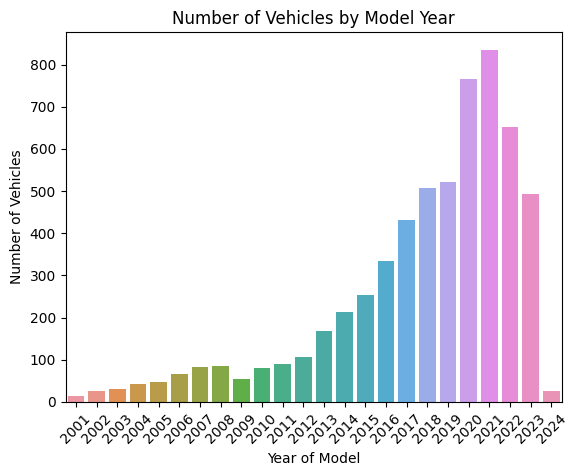

In [4]:
# count of vehicles by year
recent_df = new_df[new_df['year'] > 2000]
c_plot = sns.countplot(recent_df, x='year')
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=45)
c_plot.set_xlabel("Year of Model")
c_plot.set_ylabel("Number of Vehicles")
c_plot.set_title("Number of Vehicles by Model Year")

## Distribution of Price and Mileage by Major Makes

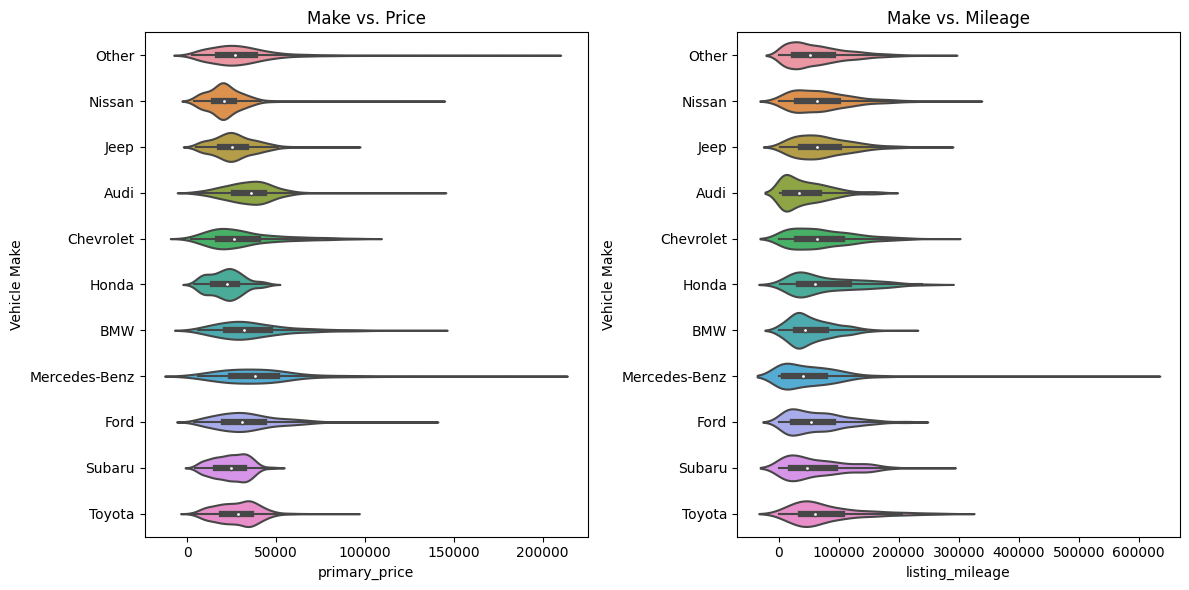

In [5]:
#sns.violinplot(data=under_200k_df, x='primary_price')

#sns.violinplot(data=under_df, x='primary_price', y='MakeVisual')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# violin plot for make vs price
sns.violinplot(x='primary_price', y='Vehicle Make', data=under_200k_df, ax=axes[0])
axes[0].set_title('Make vs. Price')
# violin plot for make  vs mileage
sns.violinplot(x='listing_mileage', y='Vehicle Make', data=under_200k_df, ax=axes[1])
axes[1].set_title('Make vs. Mileage')

plt.tight_layout()
plt.show()

## Incoming Listings by Month

In [6]:
# Creating plot of total new listings by each month. Seperating by bars by hue = year
import calendar

date_df = new_df[['listing_date']]
date_df = date_df.astype('datetime64[ns]')
date_df = date_df.dropna()
date_df['Count'] = 1
date_df['Month'] = date_df['listing_date'].dt.month
date_df['Year'] = date_df['listing_date'].dt.year
date_df['Month Name'] = date_df['Month'].apply(lambda x: calendar.month_abbr[x])
date_df.head(2)

,listing_date,Count,Month,Year,Month Name
0,2021-09-21,1,9,2021,Sep
1,2022-03-15,1,3,2022,Mar


Text(0.5, 1.0, 'New Listings by Month')

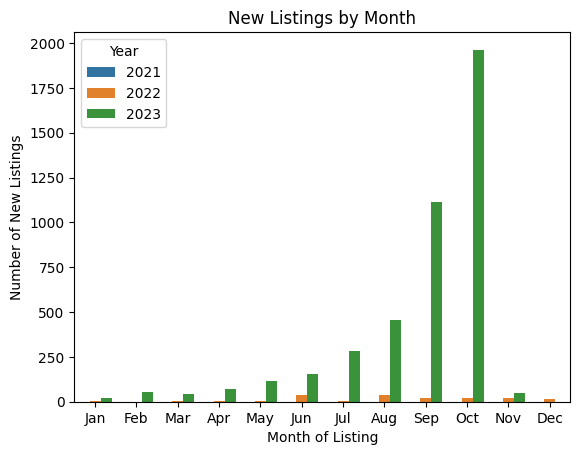

In [10]:

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
l_plot = sns.barplot(data = date_df, x = 'Month', y = 'Count', estimator='sum', hue='Year')
l_plot.set_xticklabels(months)
l_plot.set_ylabel('Number of New Listings')
l_plot.set_xlabel('Month of Listing')
l_plot.set_title('New Listings by Month')


## Pie Chart of Deal Gauge, Clustering Model?

Deal
Fair                    830
Good                   3246
Great                  1448
No Assessment Given     478
dtype: int64


C:\Users\Paul\AppData\Local\Temp\ipykernel_3160\2588167760.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



([<matplotlib.patches.Wedge at 0x194e60ce4d0>,
 [Text(0.9978154834603503, 0.46299488222526564, 'Fair'),
  Text(-0.9239044700116608, 0.5969929064004634, 'Good'),
  Text(0.3381657476803143, -1.0467301118702061, 'Great'),
  Text(1.0657500296683635, -0.27235431750182043, 'No Assessment Given')])

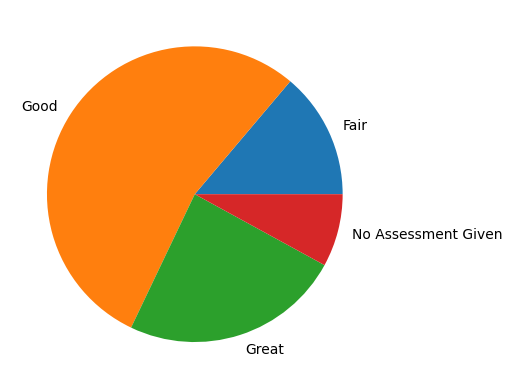

In [118]:
# deal gauge
def get_deal(val):
    val = str(val).lower()
    s_list = val.split(" ")
    if "good" in s_list:
        return "Good"
    elif "great" in s_list:
        return "Great"
    elif "fair" in s_list:
        return "Fair"
    else:
        return "No Assessment Given"

gauge_df = new_df[['deal_gauge']]
gauge_df['Deal'] = gauge_df.deal_gauge.apply(lambda x: get_deal(x))
gauge_df = gauge_df.groupby('Deal').size()
print(gauge_df)

plt.pie(x=gauge_df.values, labels= ["Fair", "Good", "Great", "No Assessment Given"])

## Average Price of a Used Vehicle by make

Text(0.5, 1.0, 'Average Price of Used Vehicles')

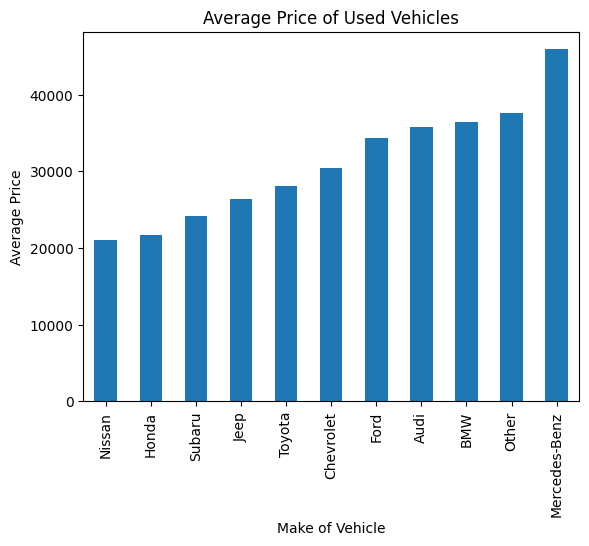

In [14]:
# Move other to begin or end
desired_order = ['Ford', 'Toyota', 'Jeep', 'Chevrolet', 'Subaru','Nissan','BMW','Honda','Audi','Mercedes-Benz', 'Other']

model_p_avg = new_df[['primary_price', 'Vehicle Make']].groupby('Vehicle Make')['primary_price'].mean()
model_p_avg_sorted = model_p_avg.loc[desired_order].sort_values().reset_index()
img = model_p_avg_sorted.plot(kind='bar', x='Vehicle Make', y='primary_price', legend=False)
img.set_xticklabels(img.get_xticklabels(), rotation=90)
img.set_ylabel('Average Price')
img.set_xlabel('Make of Vehicle')
img.set_title('Average Price of Used Vehicles')



## Scatterplot for different relational things

<Axes: xlabel='listing_mileage', ylabel='primary_price'>

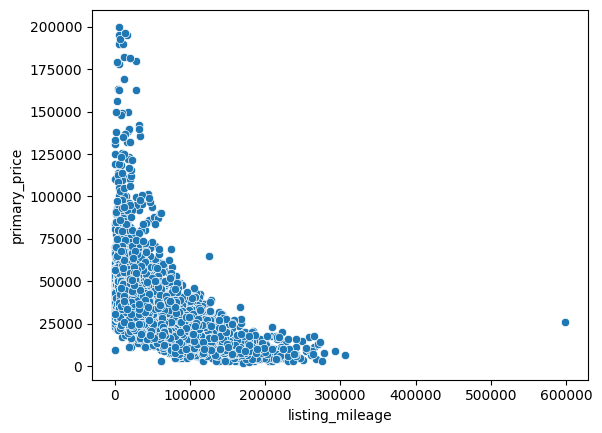

In [63]:
sns.scatterplot(data=under_200k_df, x='listing_mileage', y='primary_price')

## Facet Grid of different scatterplots

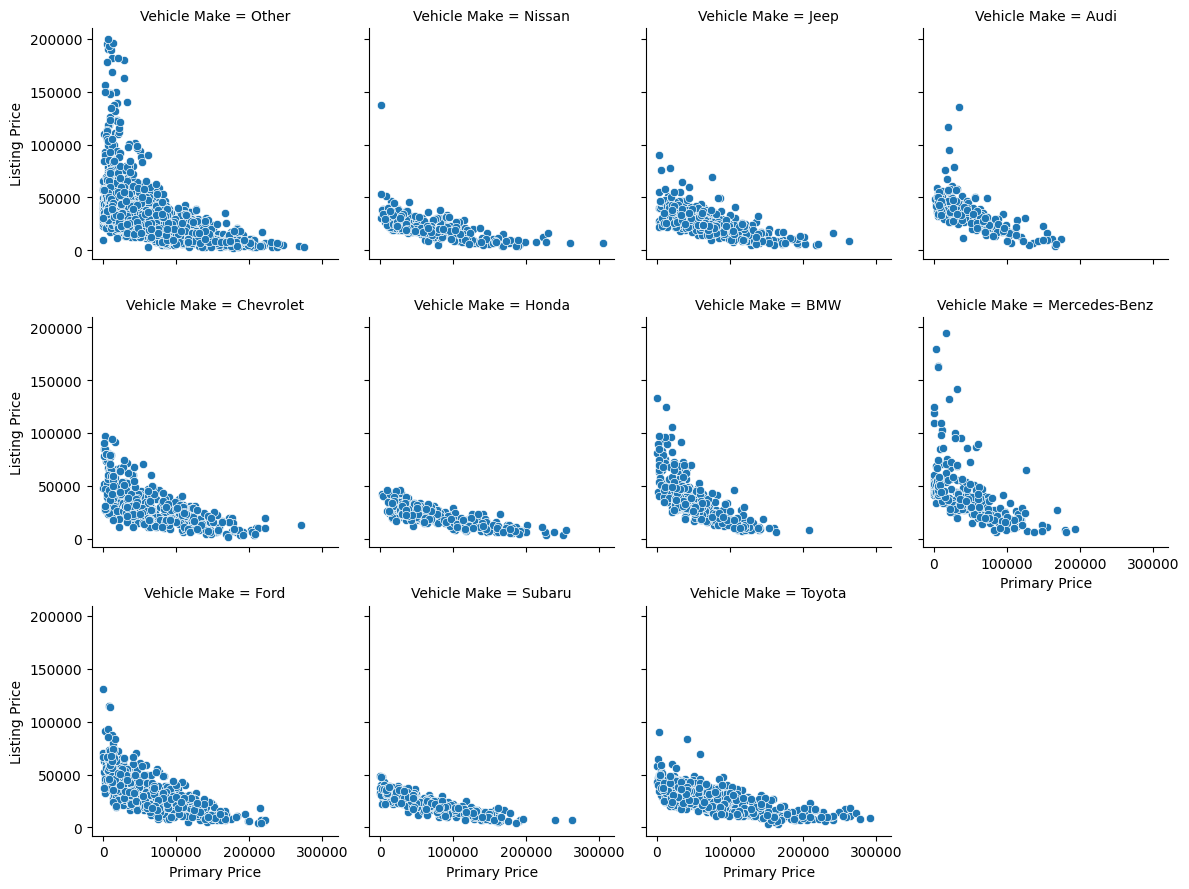

In [18]:
g = sns.FacetGrid(under_200k_df[under_200k_df['listing_mileage'] < 500000], col = 'Vehicle Make', col_wrap=4)
g.map(sns.scatterplot, 'listing_mileage', 'primary_price')
g.set_xlabels('Primary Price')
g.set_ylabels('Listing Price')

## Boxplots

Text(0, 0.5, 'Listing Price')

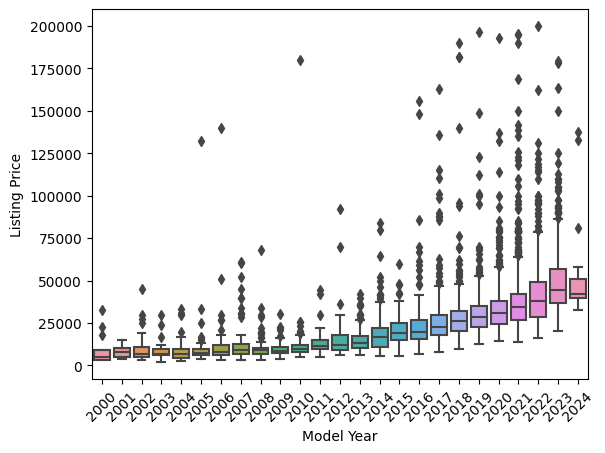

In [16]:
bp = sns.boxplot(data=under_200k_df[under_200k_df['year']>=2000], x='year', y='primary_price')
bp.set_xticklabels(bp.get_xticklabels(), rotation=45)
bp.set_xlabel('Model Year')
bp.set_ylabel('Listing Price')

## Histogram showing count of how long vehicles are available for

<Axes: xlabel='Days Avaliable', ylabel='Count'>

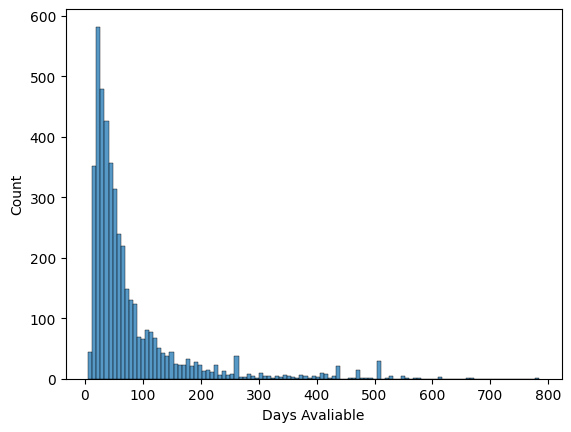

In [20]:

#sns.scatterplot(data=under_200k_df[under_200k_df['vin'] != 'WMWXJ1C05P2S72083'], x='Days Avaliable', y='price_change_percentage')
sns.histplot(data=under_200k_df[under_200k_df['vin'] != 'WMWXJ1C05P2S72083'], x='Days Avaliable')

## Random Stuff to small answers for EDA

In [5]:
# There are 50 cars over 200k
#large_df = make_df[make_df['primary_price'] > 200000]
#en(large_df.index)

new_df[['vin', 'price_change_percentage']].dropna().sort_values('price_change_percentage')

#new_df[new_df['vin'] == 'WMWXJ1C05P2S72083']

,vin,price_change_percentage
4055,3PCAJ5KR2PF108528,-9.562010e+01
993,3KPF24AD8ME317535,-9.212420e+01
4913,SHHFK7H65MU203946,-8.983845e+01
141,SAJHV1641JC548904,-7.280670e+01
144,SAJKY1746MC646570,-6.159532e+01
...,...,...
108,KMHFU45E23A250196,6.693440e+01
1432,1FMYU93135KD40931,8.019246e+01
1892,5NPET4AC9AH594699,8.350033e+01
4189,1G4NJ52M1VC415250,1.008065e+02
